<a href="https://www.kaggle.com/code/popoolarofihabiola/detecting-misinformation-on-twitter?scriptVersionId=175147116" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sn 
import matplotlib.pyplot as plt

In [2]:
path = "/kaggle/input/fake-and-real-news-dataset/Fake.csv"
path2 = "/kaggle/input/fake-and-real-news-dataset/True.csv"

In [3]:
true = pd.read_csv(path)
fals = pd.read_csv(path2)

In [4]:
true.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


In [5]:
true = true.drop(["date" , "title" , "subject"] , axis = 1)
fals = fals.drop(["date" ,"title" , "subject"] , axis = 1)

In [6]:
true.head(3)

,text
0,Donald Trump just couldn t wish all Americans ...
1,House Intelligence Committee Chairman Devin Nu...
2,"On Friday, it was revealed that former Milwauk..."


In [7]:
true['label'] = 1
fals['label'] = 0

In [8]:
true.head(3)

,text,label
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1


In [9]:
fals.head(3)

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0


In [10]:
data = pd.concat([true, fals])
data = data.sample(frac=1).reset_index(drop=True)

In [11]:
data.head()

,text,label
0,Donald Trump put on his tin-foil hat and raged...,1
1,"Well, that didn t take long. In the short time...",1
2,"Graphic, uncensored and disturbing is how Jam...",1
3,Bill Clinton was falsely confident in his plan...,1
4,COPENHAGEN (Reuters) - Danish police said on S...,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [13]:
data.duplicated().sum()

6251

In [14]:
data.shape

(44898, 2)

In [15]:
data = data.drop_duplicates()

In [16]:
data.duplicated().sum()

0

In [17]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [18]:
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [19]:
data['text'] = data['text'].apply(remove_punctuation)

In [20]:
data.head()

,text,label
0,Donald Trump put on his tinfoil hat and raged ...,1
1,Well that didn t take long In the short time s...,1
2,Graphic uncensored and disturbing is how Jame...,1
3,Bill Clinton was falsely confident in his plan...,1
4,COPENHAGEN Reuters Danish police said on Satu...,0


In [21]:
from wordcloud import WordCloud

In [22]:
fake_news = data[data["label"] == 0]
true_news = data[data["label"] == 1]

In [23]:
print(fake_news.shape)
print(true_news.shape)

(21192, 2)
(17455, 2)


In [24]:
fake_news = ' '.join(fake_news["text"])
true_news = ' '.join(true_news["text"])

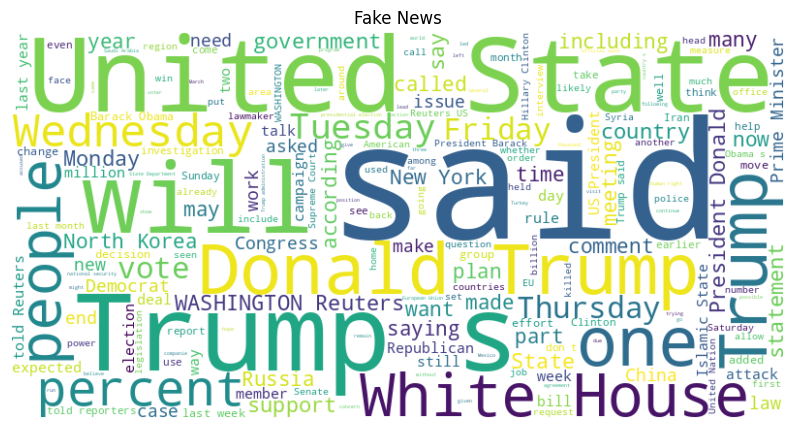

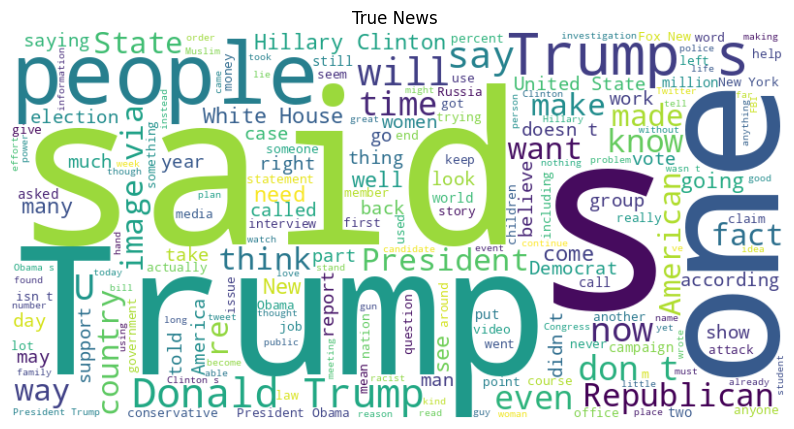

In [25]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_news)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Fake News")
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(true_news)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("True News ")
plt.show()

In [26]:
data.head()

,text,label
0,Donald Trump put on his tinfoil hat and raged ...,1
1,Well that didn t take long In the short time s...,1
2,Graphic uncensored and disturbing is how Jame...,1
3,Bill Clinton was falsely confident in his plan...,1
4,COPENHAGEN Reuters Danish police said on Satu...,0


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tdf = TfidfVectorizer()

In [28]:
x = data[["text"]]
y = data["label"]

In [29]:
x

,text
0,Donald Trump put on his tinfoil hat and raged ...
1,Well that didn t take long In the short time s...
2,Graphic uncensored and disturbing is how Jame...
3,Bill Clinton was falsely confident in his plan...
4,COPENHAGEN Reuters Danish police said on Satu...
...,...
44892,LONDON Reuters British Prime Minister Theresa...
44893,Reuters A photo of former presidential candid...
44894,DUBLIN Reuters Ireland has made significant ...
44896,This January 13th story deletes reference to ...


In [30]:
x = tdf.fit_transform(x["text"])

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x.shape

(38647, 225975)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=41)

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
mb = MultinomialNB()
svm = SVC()
lr  = LogisticRegression()
dct = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [35]:
mb.fit(x_train , y_train)
svm.fit(x_train , y_train)
lr.fit(x_train , y_train)
dct.fit(x_train , y_train)
rfc.fit(x_train , y_train)

RandomForestClassifier()

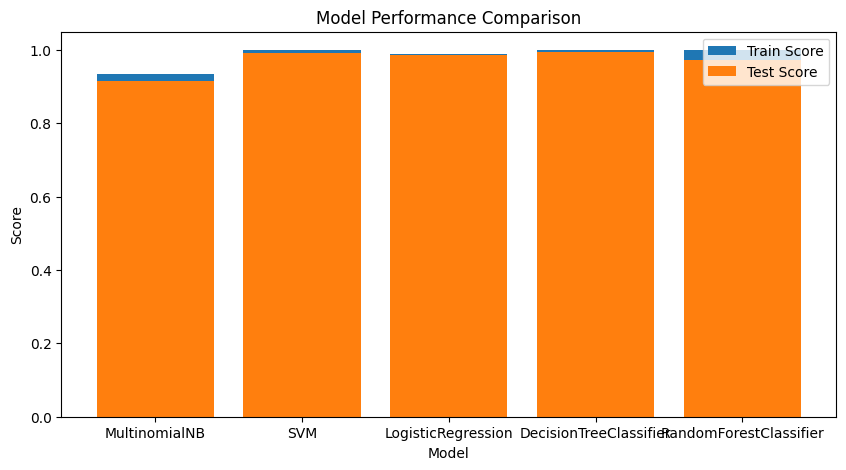

In [36]:
plt.figure(figsize=(10,5))

train_scores = [mb.score(x_train, y_train), svm.score(x_train, y_train), lr.score(x_train, y_train), dct.score(x_train, y_train), rfc.score(x_train, y_train)]
test_scores = [mb.score(x_test, y_test),svm.score(x_test, y_test), lr.score(x_test, y_test), dct.score(x_test, y_test), rfc.score(x_test, y_test)]

model_names = ['MultinomialNB', 'SVM', 'LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier']

plt.bar(model_names, train_scores, label="Train Score")
plt.bar(model_names, test_scores, label="Test Score")

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()

MultinomialNB


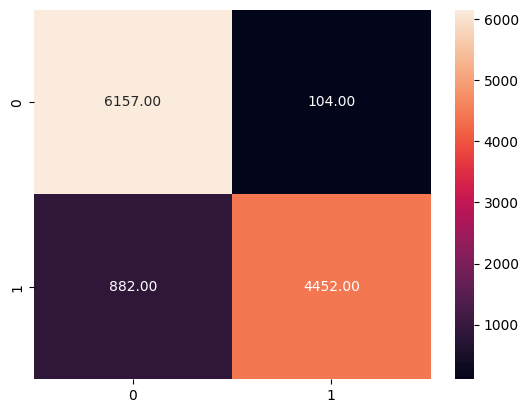

SVM


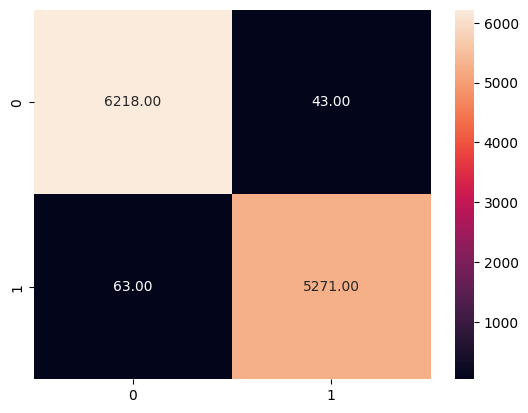

LogisticRegression


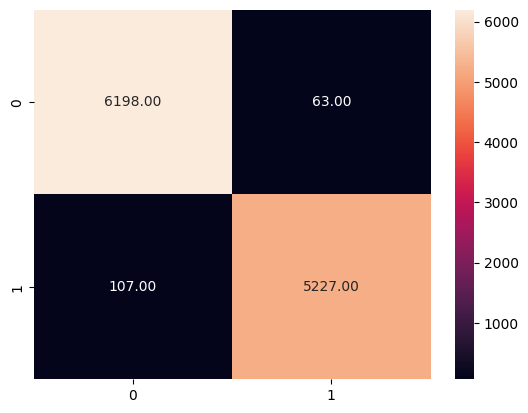

DecisionTreeClassifier


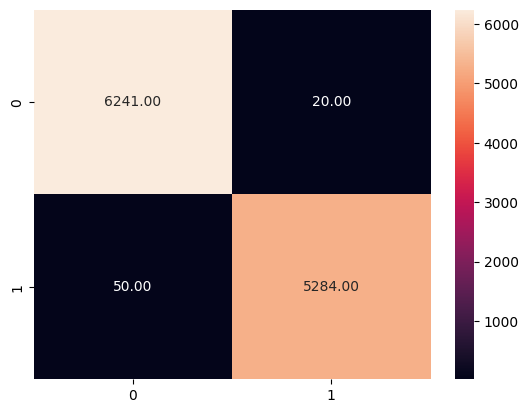

RandomForestClassifier


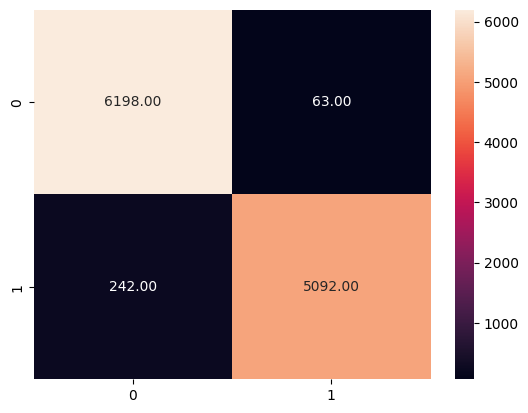

In [37]:
from sklearn.metrics import confusion_matrix ,classification_report
import seaborn as sns
mod = [mb, svm, lr,dct ,rfc]  # Assuming dtc, svm, rfc, gbc, lr are trained models
model_name = ['MultinomialNB', 'SVM', 'LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier']
for model, model_name in zip(mod, model_name):
    corr = confusion_matrix(y_test, model.predict(x_test))
    print(model_name)
    sns.heatmap(corr, annot=True, fmt="0.2f")
    plt.show()  # Show each confusion matrix separately

In [38]:
for model, model_name in zip(mod, model_names):
     
    print(model_name)
    print(classification_report(y_test,model.predict(x_test)))

MultinomialNB
              precision    recall  f1-score   support

           0       0.87      0.98      0.93      6261
           1       0.98      0.83      0.90      5334

    accuracy                           0.91     11595
   macro avg       0.93      0.91      0.91     11595
weighted avg       0.92      0.91      0.91     11595

SVM
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6261
           1       0.99      0.99      0.99      5334

    accuracy                           0.99     11595
   macro avg       0.99      0.99      0.99     11595
weighted avg       0.99      0.99      0.99     11595

LogisticRegression
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6261
           1       0.99      0.98      0.98      5334

    accuracy                           0.99     11595
   macro avg       0.99      0.98      0.99     11595
weighted avg       0.99      0.99    